In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
with tf.device("/cpu:0"):
    max_features = 10000
    max_len = 500
    batch_size = 32
    
    print("load_data")
    (input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
    print(len(input_train))
    print(len(input_test))
    
    input_train = pad_sequences(input_train, maxlen=max_len)
    input_test = pad_sequences(input_test, maxlen=max_len)
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(SimpleRNN(32))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
    history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

load_data


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

25000
25000
Epoch 1/10
625/625 [==============================] - 50s 78ms/step - loss: 0.6728 - acc: 0.5544 - val_loss: 0.4462 - val_acc: 0.8004
Epoch 2/10
625/625 [==============================] - 47s 76ms/step - loss: 0.3877 - acc: 0.8334 - val_loss: 0.3627 - val_acc: 0.8472
Epoch 3/10
625/625 [==============================] - 49s 78ms/step - loss: 0.2850 - acc: 0.8883 - val_loss: 0.3726 - val_acc: 0.8460
Epoch 4/10
625/625 [==============================] - 49s 78ms/step - loss: 0.2437 - acc: 0.9014 - val_loss: 0.4275 - val_acc: 0.8198
Epoch 5/10
625/625 [==============================] - 49s 78ms/step - loss: 0.1911 - acc: 0.9259 - val_loss: 0.4417 - val_acc: 0.8254
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1265 - acc: 0.9563 - val_loss: 0.5179 - val_acc: 0.8162
Epoch 7/10
625/625 [==============================] - 47s 76ms/step - loss: 0.0834 - acc: 0.9711 - val_loss: 0.5192 - val_acc: 0.8198
Epoch 8/10
625/625 [==============================

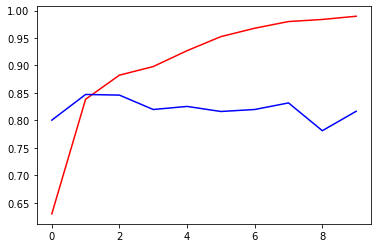

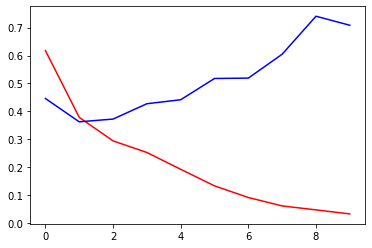

In [5]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["acc"]))
    plt.plot(x, history.history["acc"], "r")
    plt.plot(x, history.history["val_acc"], "b")
    plt.figure()
    
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

Epoch 1/10
157/157 [==============================] - 58s 342ms/step - loss: 0.6157 - acc: 0.6659 - val_loss: 0.4444 - val_acc: 0.8002
Epoch 2/10
157/157 [==============================] - 55s 349ms/step - loss: 0.3187 - acc: 0.8722 - val_loss: 0.3638 - val_acc: 0.8598
Epoch 3/10
157/157 [==============================] - 48s 309ms/step - loss: 0.2312 - acc: 0.9161 - val_loss: 0.3207 - val_acc: 0.8640
Epoch 4/10
157/157 [==============================] - 51s 325ms/step - loss: 0.2036 - acc: 0.9248 - val_loss: 0.2809 - val_acc: 0.8860
Epoch 5/10
157/157 [==============================] - 51s 323ms/step - loss: 0.1681 - acc: 0.9417 - val_loss: 0.5342 - val_acc: 0.8512
Epoch 6/10
157/157 [==============================] - 50s 316ms/step - loss: 0.1526 - acc: 0.9475 - val_loss: 0.5917 - val_acc: 0.8486
Epoch 7/10
157/157 [==============================] - 49s 314ms/step - loss: 0.1437 - acc: 0.9508 - val_loss: 0.3683 - val_acc: 0.8828
Epoch 8/10
157/157 [==============================] - 4

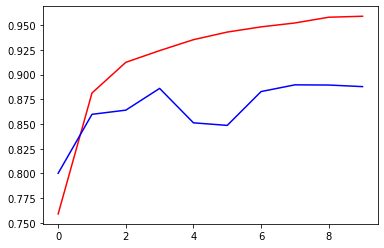

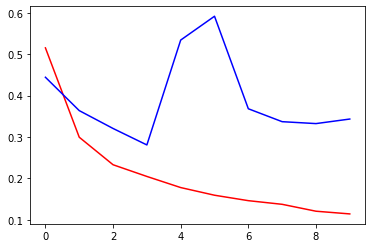

In [8]:
from tensorflow.keras.layers import LSTM

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
    
    history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
    
    x = range(len(history.history["acc"]))
    plt.plot(x, history.history["acc"], "r")
    plt.plot(x, history.history["val_acc"], "b")
    plt.figure()
    
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()    

In [1]:
import os
from os.path import expanduser
home = expanduser("~")
fname = os.path.join(home, "Downloads/Python/jena_climate_2009_2016.csv/jena_climate_2009_2016.csv")

f = open(fname)
data = f.read()
f.close()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


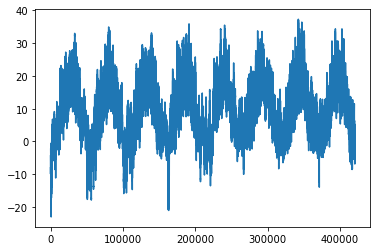

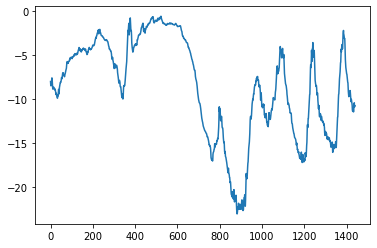

In [2]:
import numpy as np
float_data = np.zeros((len(lines), len(header) -1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    float_data[i, :] = values

import matplotlib.pyplot as plt
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.figure()
plt.plot(range(1440), temp[:1440])
plt.show()

In [4]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [5]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(
    float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(
    float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(
    float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step, batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [12]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

In [13]:
evaluate_naive_method()

0.2897359729905486


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Flatten(input_shape=(lookback//step, float_data.shape[-1])))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1))
    
    model.compile(optimizer=RMSprop(), loss="mae")
    history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 20s 38ms/step - loss: 2.1568 - val_loss: 0.7466
Epoch 2/20
500/500 [==============================] - 18s 37ms/step - loss: 0.6206 - val_loss: 0.3433
Epoch 3/20
500/500 [==============================] - 17s 34ms/step - loss: 0.3444 - val_loss: 0.3192
Epoch 4/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2835 - val_loss: 0.3128
Epoch 5/20
500/500 [==============================] - 17s 35ms/step - loss: 0.2643 - val_loss: 0.3211
Epoch 6/20
500/500 [==============================] - 17s 33ms/step - loss: 0.2502 - val_loss: 0.3079
Epoch 7/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2426 - val_loss: 0.3240
Epoch 8/20
500/500 [==============================] - 18s 35ms/step - loss: 0.2352 - val_loss: 0.3110
Epoch 9/20
500/500 [==============================] - 17s 35ms/step - loss: 0.2307 - val_loss: 0.3357
Epoch 10/20
500/500 [==============================] - 17s 35ms/step - loss: 0.225

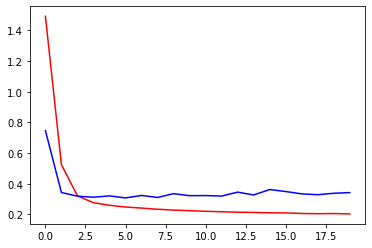

In [19]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["loss"]))
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import RMSprop

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(GRU(32, input_shape=(None, float_data.shape[-1])))
    model.add(Dense(1))
    model.compile(optimizer=RMSprop(), loss="mae")
    history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 73s 140ms/step - loss: 0.3407 - val_loss: 0.2733
Epoch 2/20
500/500 [==============================] - 77s 154ms/step - loss: 0.2864 - val_loss: 0.2679
Epoch 3/20
500/500 [==============================] - 79s 157ms/step - loss: 0.2781 - val_loss: 0.2664
Epoch 4/20
500/500 [==============================] - 77s 155ms/step - loss: 0.2746 - val_loss: 0.2609
Epoch 5/20
500/500 [==============================] - 74s 148ms/step - loss: 0.2682 - val_loss: 0.2674
Epoch 6/20
500/500 [==============================] - 74s 148ms/step - loss: 0.2621 - val_loss: 0.2656
Epoch 7/20
500/500 [==============================] - 76s 152ms/step - loss: 0.2597 - val_loss: 0.2693
Epoch 8/20
500/500 [==============================] - 77s 154ms/step - loss: 0.2523 - val_loss: 0.2685
Epoch 9/20
500/500 [==============================] - 77s 154ms/step - loss: 0.2475 - val_loss: 0.2726
Epoch 10/20
500/500 [==============================] - 76s 152ms/step - l

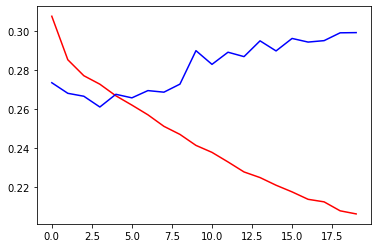

In [24]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["loss"]))
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import RMSprop

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
    model.add(Dense(1))
    model.compile(optimizer=RMSprop(), loss="mae")
    history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 107s 206ms/step - loss: 0.3598 - val_loss: 0.2770
Epoch 2/40
500/500 [==============================] - 102s 203ms/step - loss: 0.3069 - val_loss: 0.2758
Epoch 3/40
500/500 [==============================] - 103s 206ms/step - loss: 0.3021 - val_loss: 0.2733
Epoch 4/40
500/500 [==============================] - 104s 208ms/step - loss: 0.2983 - val_loss: 0.2714
Epoch 5/40
500/500 [==============================] - 100s 201ms/step - loss: 0.2919 - val_loss: 0.2692
Epoch 6/40
500/500 [==============================] - 102s 204ms/step - loss: 0.2867 - val_loss: 0.2703
Epoch 7/40
500/500 [==============================] - 113s 225ms/step - loss: 0.2846 - val_loss: 0.2684
Epoch 8/40
500/500 [==============================] - 104s 209ms/step - loss: 0.2791 - val_loss: 0.2743
Epoch 9/40
500/500 [==============================] - 101s 201ms/step - loss: 0.2733 - val_loss: 0.2694
Epoch 10/40
500/500 [==============================] - 103s 205m

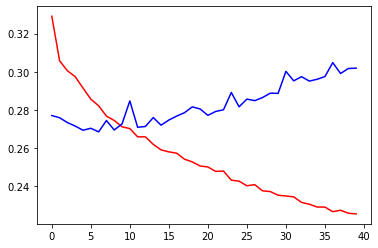

In [26]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["loss"]))
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

load_data


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

25000
25000


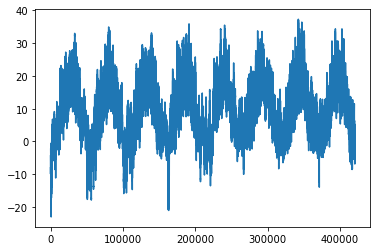

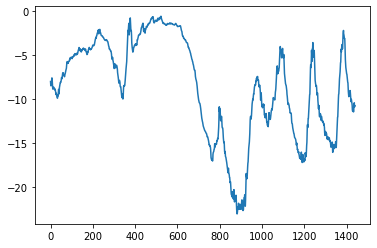

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
with tf.device("/cpu:0"):
    max_features = 10000
    max_len = 500
    batch_size = 32
    
    print("load_data")
    (input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
    print(len(input_train))
    print(len(input_test))
    
    input_train = pad_sequences(input_train, maxlen=max_len)
    input_test = pad_sequences(input_test, maxlen=max_len)
    
import os
from os.path import expanduser
home = expanduser("~")
fname = os.path.join(home, "Downloads/Python/jena_climate_2009_2016.csv/jena_climate_2009_2016.csv")

f = open(fname)
data = f.read()
f.close()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

import numpy as np
float_data = np.zeros((len(lines), len(header) -1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    float_data[i, :] = values

import matplotlib.pyplot as plt
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.figure()
plt.plot(range(1440), temp[:1440])
plt.show()

mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(
    float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(
    float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(
    float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step, batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(None, float_data.shape[-1])))
    model.add(GRU(64, activation="relu", dropout=0.1, recurrent_dropout=0.5))
    model.add(Dense(1))
    model.compile(optimizer=RMSprop(), loss="mae")
    history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 306s 596ms/step - loss: 0.3521 - val_loss: 0.2756
Epoch 2/40
500/500 [==============================] - 317s 634ms/step - loss: 0.3022 - val_loss: 0.2730
Epoch 3/40
500/500 [==============================] - 314s 627ms/step - loss: 0.2960 - val_loss: 0.2803
Epoch 4/40
500/500 [==============================] - 312s 624ms/step - loss: 0.2889 - val_loss: 0.2759
Epoch 5/40
500/500 [==============================] - 321s 643ms/step - loss: 0.2810 - val_loss: 0.2741
Epoch 6/40
500/500 [==============================] - 327s 653ms/step - loss: 0.2760 - val_loss: 0.2788
Epoch 7/40
500/500 [==============================] - 327s 654ms/step - loss: 0.2728 - val_loss: 0.2737
Epoch 8/40
500/500 [==============================] - 303s 607ms/step - loss: 0.2664 - val_loss: 0.2732
Epoch 9/40
500/500 [==============================] - 311s 623ms/step - loss: 0.2637 - val_loss: 0.2812
Epoch 10/40
500/500 [==============================] - 318s 636m

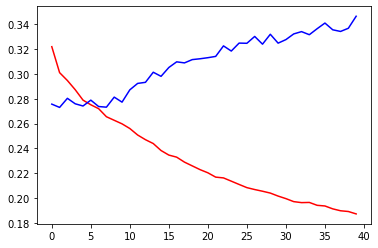

In [6]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["loss"]))
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

max_features = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

import tensorflow as tf
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(32))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 76s 461ms/step - loss: 0.5823 - acc: 0.6729 - val_loss: 0.3681 - val_acc: 0.8456
Epoch 2/10
157/157 [==============================] - 71s 452ms/step - loss: 0.3120 - acc: 0.8811 - val_loss: 0.6279 - val_acc: 0.7536
Epoch 3/10
157/157 [==============================] - 68s 434ms/step - loss: 0.2482 - acc: 0.9098 - val_loss: 0.3064 - val_acc: 0.8856
Epoch 4/10
157/157 [==============================] - 68s 431ms/step - loss: 0.2128 - acc: 0.9239 - val_loss: 0.4083 - val_acc: 0.8552
Epoch 5/10
157/157 [==============================] - 67s 429ms/step - loss: 0.1758 - acc: 0.9385 - val_loss: 0.3646 - val_acc: 0.8794
Epoch 6/10
157/157 [==============================] - 68s 431ms/step - loss: 0.1567 - acc: 0.9441 - val_loss: 0.5187 - val_acc: 0.8312
Epoch 7/10
157/157 [==============================] - 68s 431ms/step - loss: 0.1461 - acc: 0.9506 - val_loss: 0.3872 - val_acc: 0.8518
Epoch 8/10
157/157 [==============================] - 6

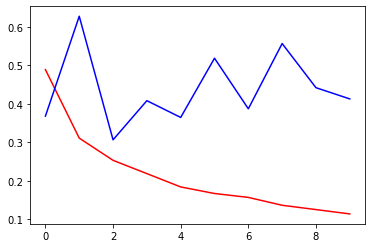

In [9]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["loss"]))
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

In [11]:
from tensorflow.keras.layers import Bidirectional
import tensorflow as tf
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_feartures = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import RMSprop

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(Conv1D(32, 7, activation="relu"))
    model.add(MaxPooling1D(5))
    model.add(Conv1D(32, 7, activation="relu"))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1))
    model.summary()
    model.compile(optimizer=RMSprop(lr=1e-4), loss="binary_crossentropy", metrics=["acc"])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

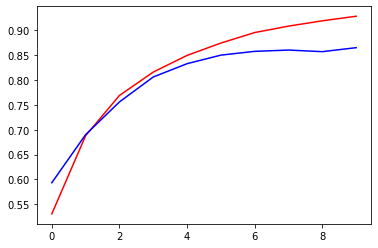

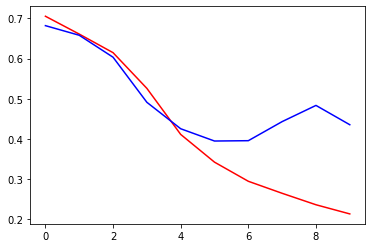

In [14]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["loss"]))
    plt.plot(x, history.history["acc"], "r")
    plt.plot(x, history.history["val_acc"], "b")
    plt.figure()
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import RMSprop

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Conv1D(32, 5, activation="relu", input_shape=(None, float_data.shape[-1])))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(32, 5, activation="relu"))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(32, 5, activation="relu"))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1))
    
    model.compile(optimizer=RMSprop(), loss="mae")
    history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 43s 84ms/step - loss: 0.4459 - val_loss: 0.4399
Epoch 2/20
500/500 [==============================] - 41s 83ms/step - loss: 0.3692 - val_loss: 0.4423
Epoch 3/20
500/500 [==============================] - 46s 92ms/step - loss: 0.3412 - val_loss: 0.4368
Epoch 4/20
500/500 [==============================] - 44s 89ms/step - loss: 0.3263 - val_loss: 0.4352
Epoch 5/20
500/500 [==============================] - 46s 92ms/step - loss: 0.3091 - val_loss: 0.4292
Epoch 6/20
500/500 [==============================] - 46s 93ms/step - loss: 0.2980 - val_loss: 0.4422
Epoch 7/20
500/500 [==============================] - 43s 87ms/step - loss: 0.2896 - val_loss: 0.4544
Epoch 8/20
500/500 [==============================] - 45s 91ms/step - loss: 0.2821 - val_loss: 0.4465
Epoch 9/20
500/500 [==============================] - 51s 101ms/step - loss: 0.2796 - val_loss: 0.4527
Epoch 10/20
500/500 [==============================] - 49s 99ms/step - loss: 0.27

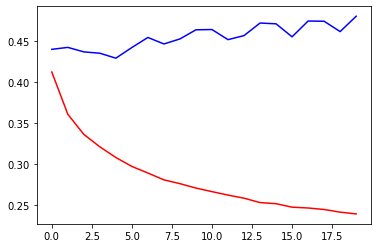

In [19]:
import matplotlib.pyplot as plt
with tf.device("/cpu:0"):
    x = range(len(history.history["loss"]))

    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()